<a href="https://colab.research.google.com/github/datacloudgui/Spreadsheet-Comparision-Report/blob/master/Attendance_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Verificador de asistencia**

El presente notebook programado en Python te ayuda a comparar la asistencia entre una lista de personas que deberian asistir a una reunión y la lista de asistencia que captura la extensión "asistencia en meet".

Si no usas google meet, puedes modificar este código para tu archivo de asistencia, el cual esta disponible en https://github.com/datacloudgui/Spreadsheet-Comparision-Report

**Si no has trabajado con esta gran herramienta (Google Colab)**, puedes ver una corta introducción acá:
https://www.youtube.com/watch?v=YmZcuIStFCc

Rapidamente:
- Las celdas de código se resaltan en gris, cuando pases el cursor por la celda aparecera un icono de **"play"** para que ejecutes el código contenido en la celda, también puedes ejecutarlo con **Shift + Enter**

Sigue las instrucciones y podremos comparar la asistencia rapidamente, para encontrar quien falto y quien llego que no esperabamos.


#Registro de asistencia

Debes generar un reporte digital de asistencia en la plataforma donde tengas las reuniónes virtuales.

**Si usas meet**, también debes usar la extensión **"Asistencia en meet"** la cual te almacenara los nombres de los asistentes en una hoja de google.

El registro de la extensión lo compararemos con la lista oficial de personas que debieron asistir a la reunión.

Extensión "Asistencia en meet" en google chrome:

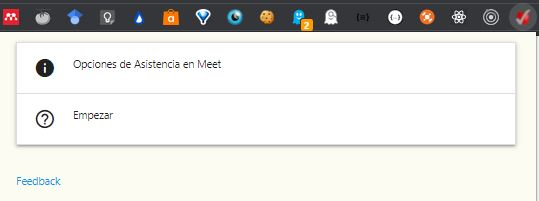

#Ejemplo

Acá tienes un archivo de asistencia de la extensión "Asistencia en Meet".

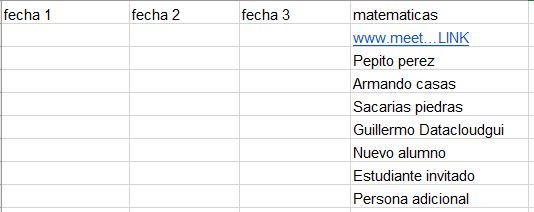

Y acá tienes la lista oficial de tu institución:

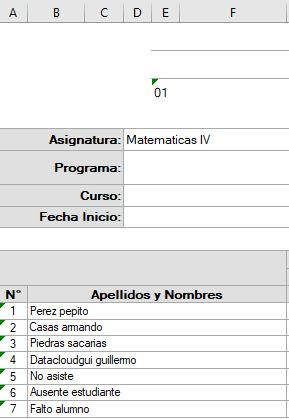

Este notebook te ayudará a verificar quienes estuvieron en la reunión, quienes faltaron y si asistieron personas que no esperaba mediante la generación de un reporte con la siguiente estructura:

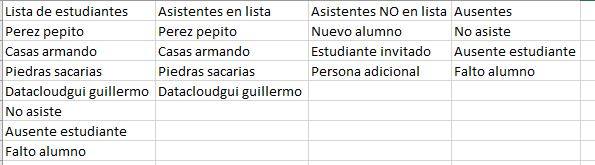

#**Requerimientos**

**Para probar este notebook**
- Una cuenta de google donde puedas copiar este notebook (Archivo/Guardar una copia).
- Descargar los archivos .xlsx (Excel) disponibles en mi repositorio:
https://github.com/datacloudgui/Spreadsheet-Comparision-Report
- Usaremos el archivo Meet.xlsx y matematicas.xlsx

**Pdta:** Si tienes una instalación de python en tu computador, puedes clonar o descargar el código, crear un ambiente virtual, instalar la libreria openpyxl y probar en tu PC.
De lo contrario, continua leyendo.

****

**Para usar este notebook en lo que lo necesites**

- Una cuenta de google donde puedas copiar este notebook (Archivo/Guardar una copia).
- La lista oficial de personas esperadas en la reunión:
En el caso de universidades la lista oficial de alumnos que descargas de tu sistema.
Una lista de excel tambien servira, sin embargo, debes guardarla con la opción **Guardar como** antes de subirla a la carpeta drive donde trabajarás.
- La lista que te genera la extensión "Asistencia en meet" (la extensión funciona en el navegador Google Chrome)

#**Importante requerimientos de los archivos**



Para que el programa pueda comparar las listas debes tener en cuenta que los archivos deben cumplir los siguientes requisitos:

Elige un nombre corto y sin espacios para tu asignatura: Ej: **matematicas**

Ten presente mayúsculas y acentos. Sugiero que trabajes todo en minusculas y sin acentos.

- En el archivo de "Asistencia de Meet", la extensión crea columnas del registro de asistencia y en la primera fila coloca la fecha y hora, debes remplazar la fecha de la columna que corresponda por el nombre elegido: **matematicas**

El archivo quedara así:
**Nota:** No importa cuantas columnas tenga el archivo, el código buscara en la **primera fila** de todas las columnas el nombre corto **matematicas**

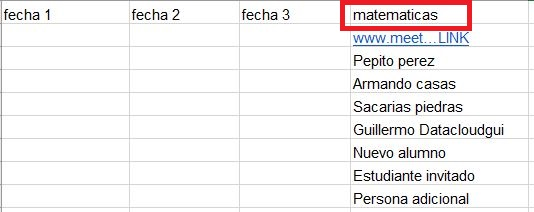

- La lista oficial o lista de personas que deberian asistir a la reunión debe llamarse de la misma forma que la columna mencionada anteriormente, para el ejemplo el archivo será: **matematicas.xlsx**


# Parámetros de trabajo

Ya casi estamos listos!!

Necesitas identificar los siguientes parametros de los dos archivos de excel a comparar:

Debes ajustar las siguientes variables de la celda de código que encuentras a continuación, según tus archivos .xslx

- **Class_list** puede tener más de una materia, usa el nombre corto elegido, en este caso **'matematicas'** (debe existir un archivo .xlsx por cada materia, en este caso, separalos por comas ['matematicas', 'espanol'])
- **list_sheet_name** es el nombre de la hoja que contiene la lista oficial de alumnos (abre el archivo de la lista oficial o de personas que se esperan y copia el nombre de la hoja en la parte inferior). En este caso **'Sheet1'**
- **list_column** Es la columna donde buscara el programa la lista oficial, con el fin de que no tengas que modificar la lista que descargas de tu sistema, solo debes especificar la columna donde se encuentran los nombres a extraer, la letra, en este caso **'B'**
- **list_word** es el titulo que se encuentra antes de la lista de alumnos (el programa buscara esta palabra en la columna indicada anteriormente), en este caso es **'Apellidos y Nombres'**

Ejemplo de columna y palabra a buscar:

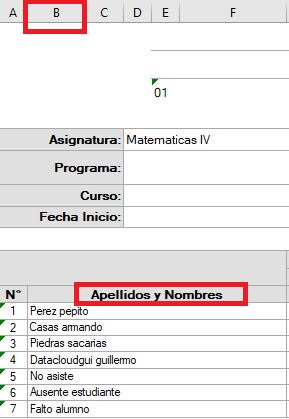

- **attendance_file** es el nombre del archivo que descargas luego de tomar la asistencia con la extensión "assistencia meet", incluyendo la extensión, en este caso **'Meet.xlsx'**
- **attendance_sheet_name** es el nombre de la hoja donde estan los nombres de los asistentes, en el archivo de asistencia, en este caso **'Attendance'**

In [21]:
## Ejecuta esta celda con en el simbolo de play al lado izquierdo

class_list=['matematicas'] #Agregar los cursos necesarios

list_sheet_name='Sheet1'
list_column='B'
list_word='Apellidos y Nombres'

attendance_file='Meet.xlsx'
attendance_sheet_name='Attendance'

#**Configuración de google Drive para leer y escribir archivos**

Ya tenemos listos los archivos, ahora:

Crea una carpeta en tu drive con el nombre que prefieras, en este caso **test_asistencia** y copia el archivo de **Meet.xlsx** y **matematicas.xlsx**.
Recuerda que si vas a comparar más materias debes tener:
- Una columna en **Meet.xlsx** con el nombre corto para cada materia.
- Un archivo excel con el llamado con el nombre corto elegido.

En los siguientes y últimos pasos configuraremos google colab para que acceda a la carpeta de drive que creaste, pueda leer los archivos **Meet.xlsx** y **matematicas.xlsx** y escribir el archivo de reporte **report.xlsx**.

Ejecuta la siguiente celda, te aparecera un enlace:

Sigue el enlace y **autoriza la cuenta donde tienes los archivos** excel y donde se guardaran los archivos.

In [22]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Cambiar a carpeta de trabajo
Ahora se debe cambiar el directorio de trabajo a la carpeta donde guardaste los archivos, en mi caso **test_asistencia**

Debes remplazar **test_asistencia** por la carpeta que creaste en **tú** drive

In [23]:
%cd /content/gdrive/My\ Drive/test_asistencia

/content/gdrive/My Drive/test_asistencia


Con el codigo de la siguiente celda verificamos que tenemos acceso a los archivos.

Deberias ver lo que se muestra en la siguiente imagen:

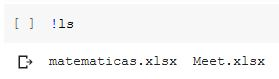

In [27]:
!ls

matematicas.xlsx  Meet.xlsx


#Listo! Ejecuta las siguientes 3 celdas y tendrás tú reporte.

Puedes dar en el simbolo de **"play"** o con **Shift + Enter**

Si configuras más de una materia, los reportes quedarán en pestañas separadas dentro de **report.xlsx**

**Nota: El archivo puede demorarse unos segundos en aparecer en la carpeta de drive que estas trabajando**

Espero te sirva mucho este programa y te ahorre mucho tiempo, como espero me lo ahorre a mi!

Puedes seguirme en Github, Twitter y Dev.to o revisar mi págian web:
https://datacloudgui.com/

https://github.com/datacloudgui

https://twitter.com/datacloudgui

https://dev.to/datacloudgui

#Instalación de libreria para manejo de archivos Excel

In [28]:
!pip install openpyxl
import openpyxl
from openpyxl import Workbook

# **Funciones a utilizar**

In [15]:
def open_excel_sheet(filename, sheet_name):
    wb = openpyxl.load_workbook(filename)
    sheet = wb.get_sheet_by_name(sheet_name)
    return sheet

def find_word_in_row(sheet, column_name, word):
    for row in range(1, sheet.max_row +1):
        if(sheet[column_name + str(row)].value == word):
            print('Inicio de la lista detectado en la fila {} del archivo'.format(row))
            list_detected=row
            break
    return list_detected

def find_word_in_column(sheet, row_index, word):
    for col in sheet.iter_cols(min_row=row_index, max_row =row_index):
        for cell in col:
            if(cell.value == word):
                print('Inicio de la lista detectado en la columna {} del archivo'.format(cell.coordinate))
                list_detected=cell.coordinate
                break
    return list_detected

def extract_list_by_index(sheet, row_start, column):
    students=[]
    for row in range (row_start+1, sheet.max_row+1):
        if(sheet[column + str(row)].value!= None):
            students.append(sheet[column + str(row)].value)
    students = list(dict.fromkeys(students)) #removing duplicates
    return students

def attended_split(list_students, attendance_students):
    #Use the oficial list to split attendance list in two list:
    #attended in list (attended_students) and attended out of list (attended_not_in_list)

    attended_students = []
    attended_not_in_list = attendance_students

    for student in list_students:
        #Split the name in official list
        words_name = student.lower().split(' ')
        word_find_count = 0
        for student_attended in attendance_students:
            #Iterate over attendance list searching the splited name
            for word in words_name:
                #Search in the current attendance item for words in the name splited
                if(student_attended.lower().find(word) != -1):
                    word_find_count += 1
                    if(word_find_count == 2):
                        #Store attended official students if at least 2 words are founded
                        # replace 2 with len(words_name) to verify all the words in the official list
                        # at the end of the process attended_not_in_list will contain the remained names 
                        #for people that attend the class but aren't in the official list.
                        attended_students.append(student)
                        attended_not_in_list.remove(student_attended)
                        break
    return attended_students, attended_not_in_list

def extract_absence_students(list_students, attended_students):
    absence_students = list_students[:]

    for item in attended_students:
        absence_students.remove(item)
    return absence_students

def write_column_report(sheet, column, title, data):
    sheet[column+'1']=title
    for row in range (0, len(data)):
        sheet[column + str(row+2)] = data[row]

def write_report(class_name, list_students, attended_students, attended_not_in_list, absence_students):
    
    columns_and_titles = []
    columns_and_titles.append(('A', 'Lista de estudiantes', list_students))
    columns_and_titles.append(('B', 'Asistentes en lista', attended_students))
    columns_and_titles.append(('C', 'Asistentes NO en lista', attended_not_in_list))
    columns_and_titles.append(('D', 'Ausentes', absence_students))

    try:
        wb = openpyxl.load_workbook("report.xlsx")
        sheet = wb.create_sheet("sheet_new")
        sheet.title = class_name
    except:
        print('No se encuentra report.xlsx, se creara este archivo')
        wb = Workbook()
        sheet = wb.active
        sheet.title = class_name

    for item in columns_and_titles:
        write_column_report(sheet, item[0], item[1], item[2])
    wb.save("report.xlsx")

In [29]:
for class_name in class_list:
        print('########## Iniciando verificación de asistencia de {}'.format(class_name))
        print('########## Iniciando detección de lista oficial de {}'.format(class_name))
        list_sheet = open_excel_sheet(class_name+'.xlsx',list_sheet_name)
        list_row_index = find_word_in_row(list_sheet, list_column, list_word)
        list_students = extract_list_by_index(list_sheet, list_row_index, list_column)

        print('########## Iniciando busqueda de columna de asistencia de {}'.format(class_name))
        attendance_sheet=open_excel_sheet(attendance_file,attendance_sheet_name)
        attendance_column_index = find_word_in_column(attendance_sheet,1,class_name)
        attendance_students = extract_list_by_index(attendance_sheet, 2, attendance_column_index[0:-1])

        print('########## Iniciando comparación de lista {}'.format(class_name))
        attended_students, attended_not_in_list = attended_split(list_students, attendance_students)
        absence_students = extract_absence_students(list_students, attended_students)

        print('########## Escribiendo el reporte en report.xlsx en la hoja {}'.format(class_name))
        write_report(class_name, list_students, attended_students, attended_not_in_list, absence_students)

########## Iniciando verificación de asistencia de matematicas
########## Iniciando detección de lista oficial de matematicas
Inicio de la lista detectado en la fila 16 del archivo
########## Iniciando busqueda de columna de asistencia de matematicas
Inicio de la lista detectado en la columna D1 del archivo
########## Iniciando comparación de lista matematicas
########## Escribiendo el reporte en report.xlsx en la hoja matematicas
No se encuentra report.xlsx, se creara este archivo


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  This is separate from the ipykernel package so we can avoid doing imports until
